### Problem Statement
classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [44]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [13]:
# Step 1: Import the data from the "weather_data.csv" file
df = pd.read_csv("datasets\\weather_classification_data.csv")
# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to understand its structure.
df.sample(7)

(13200, 11)


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
10651,45,75,20.0,81,overcast,1014.22,4,Winter,0.5,inland,Rainy
9805,19,71,7.5,22,partly cloudy,1018.40,2,Autumn,6.5,mountain,Cloudy
12305,22,24,1.5,7,clear,1029.60,5,Spring,6.5,mountain,Sunny
12435,20,66,8.5,12,clear,1013.18,10,Summer,6.0,mountain,Sunny
4844,-12,61,8.5,71,overcast,1079.97,2,Spring,3.0,inland,Sunny
4877,-8,97,3.0,74,overcast,991.78,0,Winter,1.5,mountain,Snowy
6885,0,69,7.5,83,overcast,992.99,0,Winter,2.0,mountain,Snowy


In [14]:
df.describe()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [15]:
df.isna().sum()

temperature             0
humidity                0
wind_speed              0
precipitation (%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility (km)         0
location                0
weather_type            0
dtype: int64

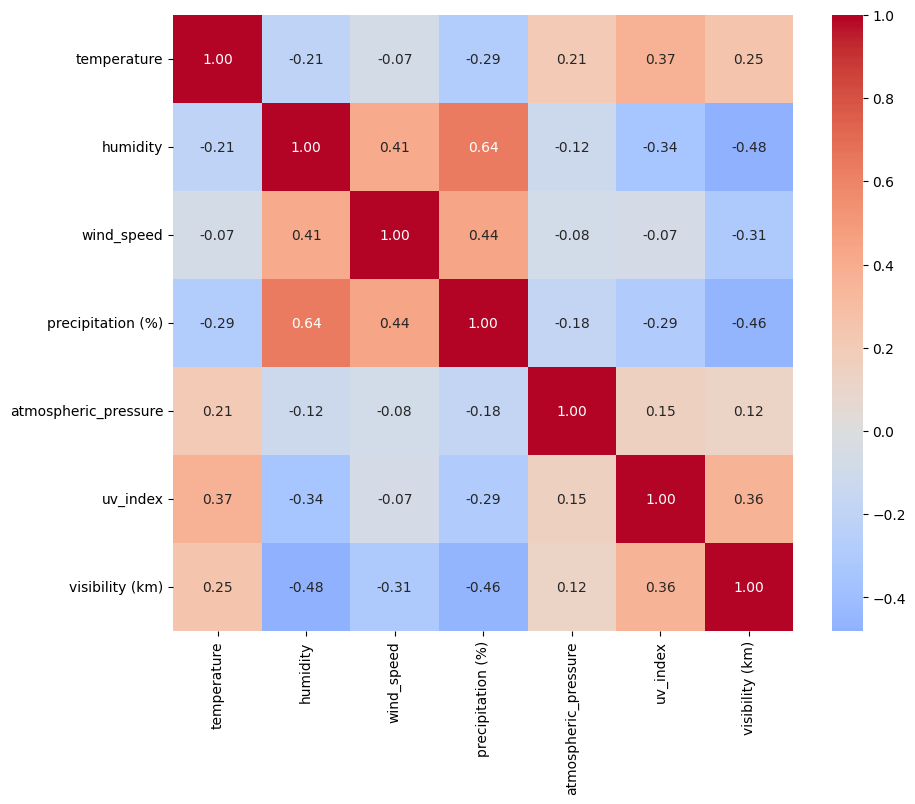

In [86]:
num_cols = ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 
            'atmospheric_pressure', 'uv_index', 'visibility (km)']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()

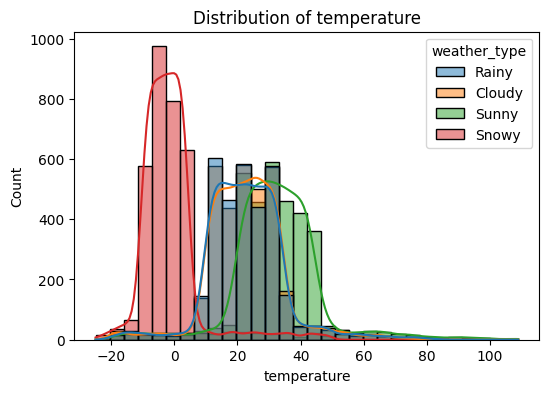

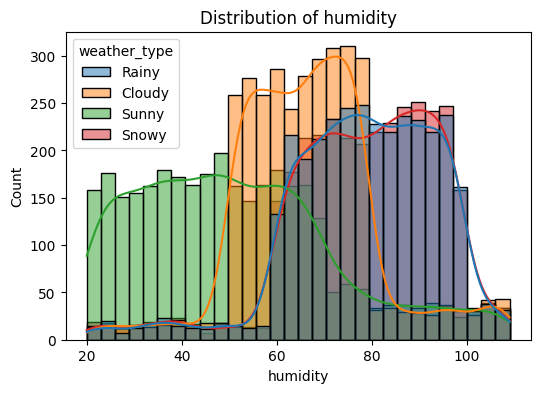

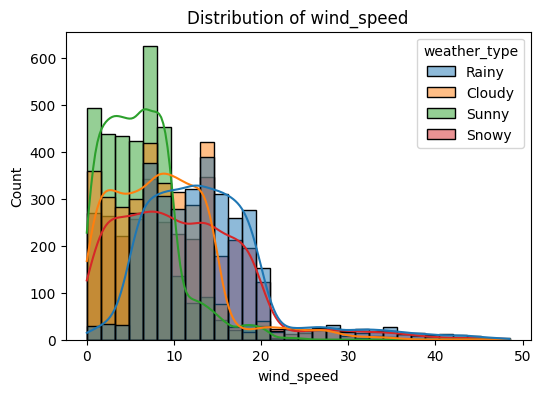

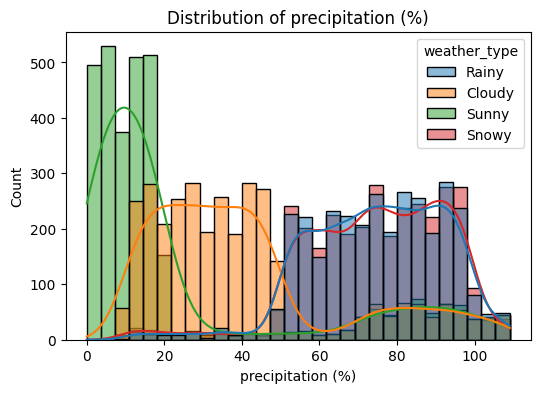

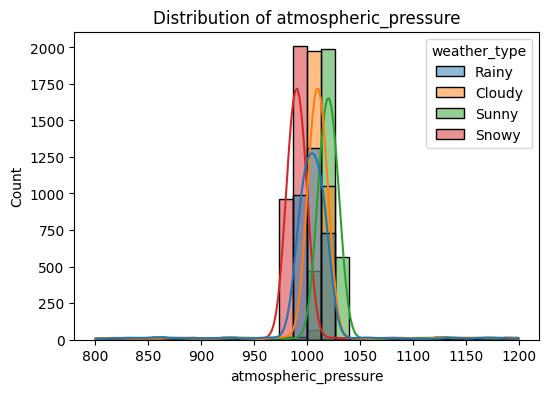

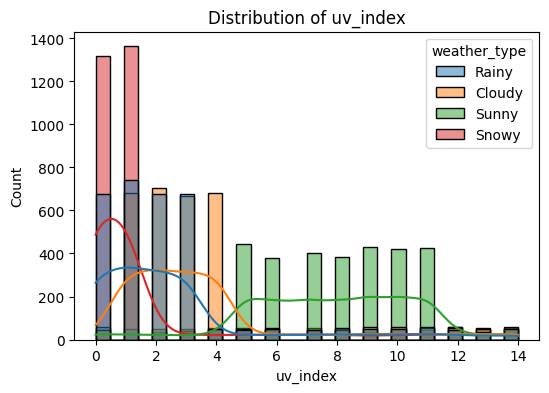

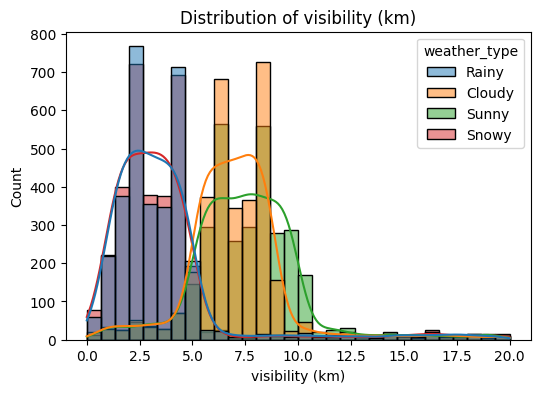

In [ ]:
# Step 4: Visualize the distribution of key features


for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=30, hue="weather_type")
    plt.title(f"Distribution of {col}")
    plt.show()



## Numeric data vizualization using boxplot

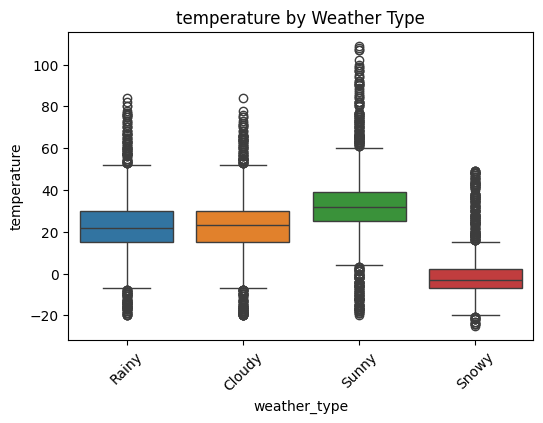

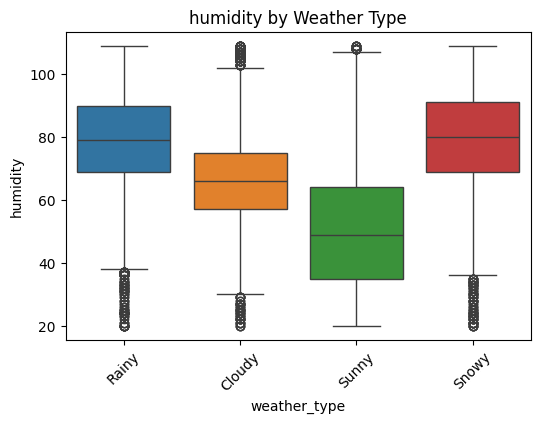

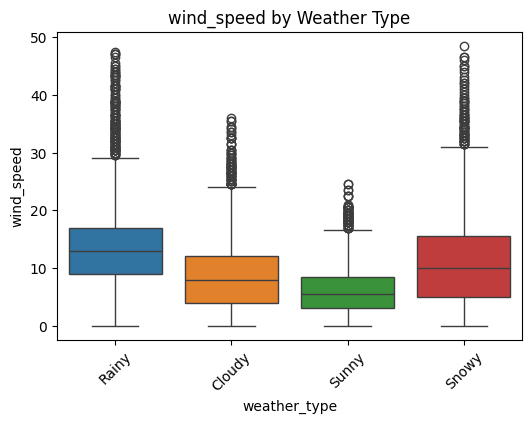

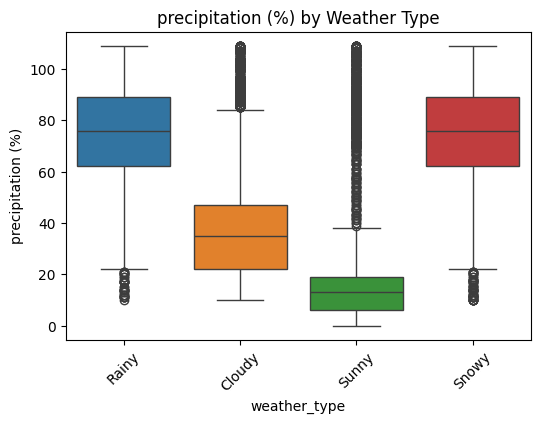

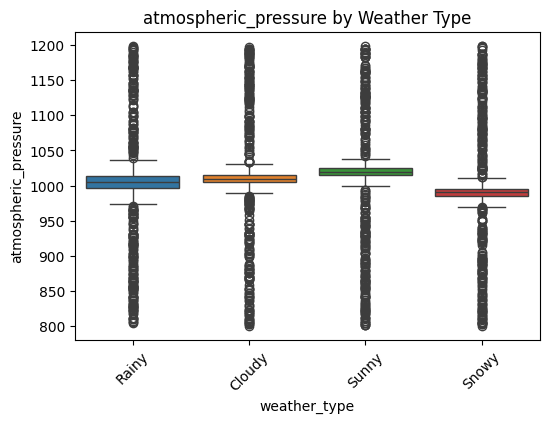

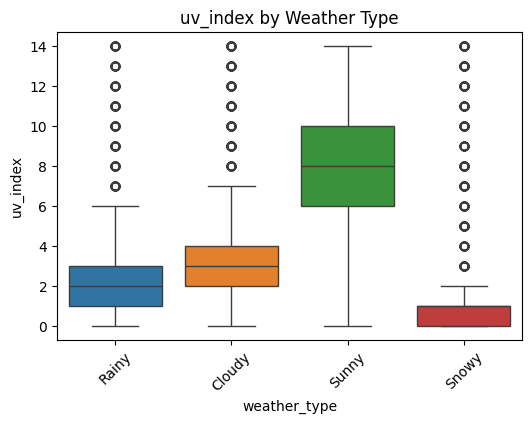

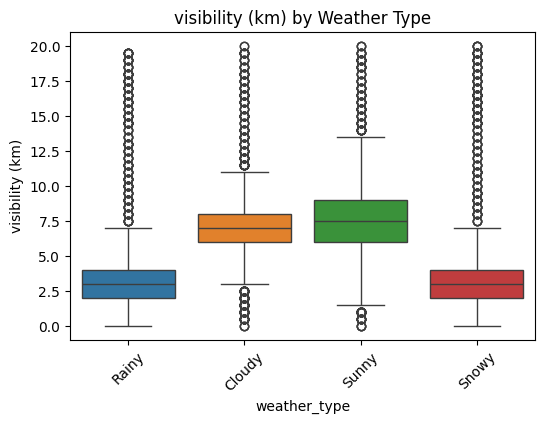

In [81]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='weather_type', y=col, hue="weather_type")
    plt.title(f'{col} by Weather Type')
    plt.xticks(rotation=45)
    plt.show()


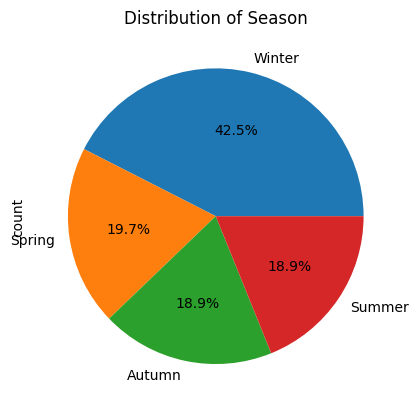

In [30]:
# Visualize season using a pie chart
df['season'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Season')
plt.show()

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [ ]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
categorical_data = df[["cloud_cover", "location", "season"]]

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(categorical_data)

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(["cloud_cover", "location", "season"]))

one_hot_df.index = df.index

df_encoded = pd.concat([df.drop(columns=["cloud_cover", "location", "season"]), one_hot_df], axis=1)

df_encoded.head()

#too cumbersome for this project


,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_clear,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_coastal,location_inland,location_mountain,season_Autumn,season_Spring,season_Summer,season_Winter
0,14,73,9.5,82,1010.82,2,3.5,Rainy,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,30,64,7.0,16,1018.72,5,5.5,Sunny,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,38,83,1.5,82,1026.25,7,1.0,Sunny,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,27,74,17.0,66,990.67,1,2.5,Rainy,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
df = pd.get_dummies(df, columns=['cloud_cover', 'location', 'season'], drop_first=True)
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,14,73,9.5,82,1010.82,2,3.5,Rainy,False,False,True,True,False,False,False,True
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,False,False,True,True,False,True,False,False
2,30,64,7.0,16,1018.72,5,5.5,Sunny,False,False,False,False,True,True,False,False
3,38,83,1.5,82,1026.25,7,1.0,Sunny,False,False,False,False,False,True,False,False
4,27,74,17.0,66,990.67,1,2.5,Rainy,False,True,False,False,True,False,False,True


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [40]:
# Step 1: Select features and target variable
X = df.drop("weather_type", axis=1)

y = df["weather_type"]
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [74]:
# Step 3: Train SVM with linear kernel
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_linear = SVC(kernel="linear")

model_linear.fit(X_train_scaled, y_train)

y_pred = model_linear.predict(X_test_scaled)
# Step 4: Print accuracy score
training_score_linear = model_linear.score(X_train_scaled, y_train)
print("linear training score: ", training_score_linear)
print("*" * 30)
print("score", model_linear.score(X_test_scaled, y_test))
accuracy_score(y_pred=y_pred, y_true=y_test)



linear training score:  0.8911931818181819
******************************
score 0.884090909090909


0.884090909090909

              precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       651
       Rainy       0.87      0.86      0.86       647
       Snowy       0.89      0.95      0.92       701
       Sunny       0.91      0.88      0.89       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



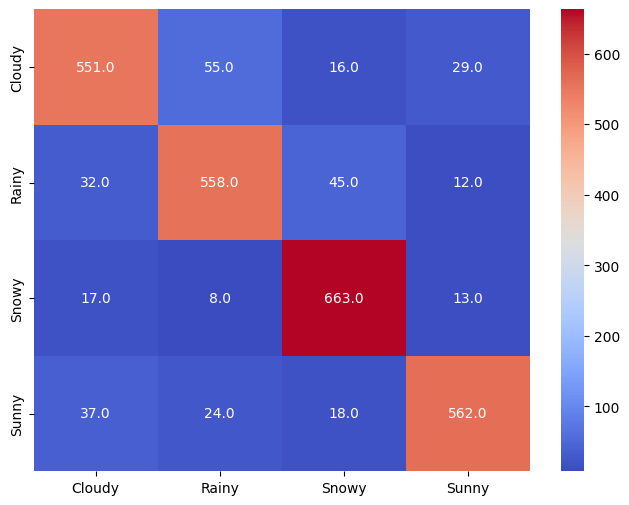

In [ ]:

#classification report
class_report_linear = classification_report(y_pred=y_pred, y_true=y_test)


#confusion matrix
conf_matrix_linear = confusion_matrix(y_pred=y_pred, y_true=y_test)
print(class_report_linear)


#Plot
labels= np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_linear, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
plt.show()



### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

training score:  0.9453598484848484
******************************
test score:  0.9037878787878788
              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87       651
       Rainy       0.88      0.90      0.89       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



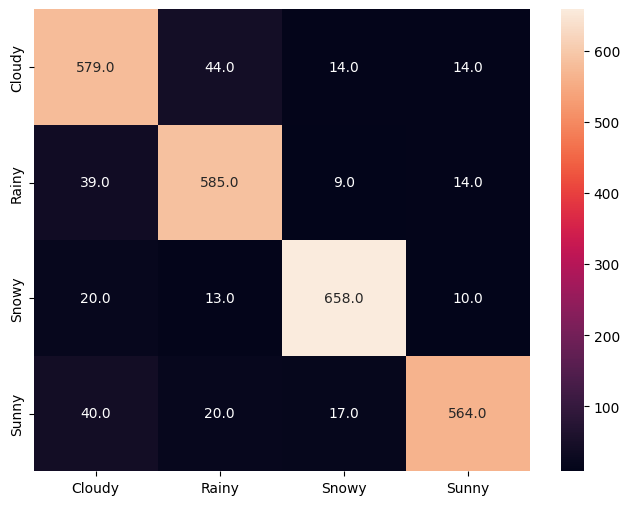

In [65]:
# Step 1: Train SVM with RBF kernel
model = SVC()
model.fit(X_train_scaled, y_train)

training_score = model.score(X_train_scaled, y_train)
print("training score: ", training_score)
print("*" * 30)

# Step 2: Print accuracy score
print("test score: ", model.score(X_test_scaled, y_test))


# Step 3: Evaluate the model
y_pred = model.predict(X_test_scaled)

#classification report
class_report = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report)

#confusion matrix
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


#plot
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", xticklabels=labels, yticklabels=labels)
plt.show()

### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

training score:  0.9322916666666666
******************************
test acc:  0.9022727272727272
              precision    recall  f1-score   support

      Cloudy       0.86      0.89      0.87       651
       Rainy       0.88      0.90      0.89       647
       Snowy       0.92      0.94      0.93       701
       Sunny       0.95      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



<Axes: >

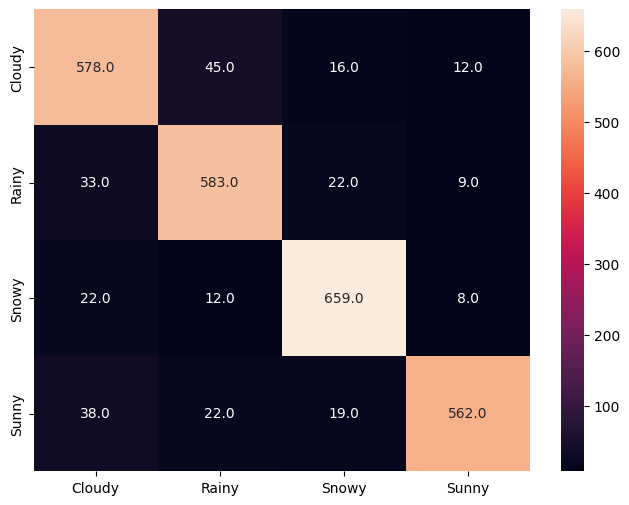

In [ ]:
# Step 1: Train the SVM model with specified hyperparameters
model_test = SVC(C=0.5, gamma="auto", kernel='rbf', degree=2)
model_test.fit(X_train_scaled, y_train)
y_pred = model_test.predict(X_test_scaled)
# Step 2: Print the model's accuracy score
print("training score: ", model_test.score(X_train_scaled, y_train))
print("*"*30)
print("test acc: ",accuracy_score(y_pred=y_pred, y_true=y_test))

# Step 3: Evaluate the model using a classification report and confusion matrix


#classification report
class_report_test = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report_test)

#confusion matrix
conf_matrix_test = confusion_matrix(y_pred=y_pred, y_true=y_test)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_test, annot=True, fmt=".1f", xticklabels=labels, yticklabels=labels)
plt.show()

### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

training score:  0.9453598484848484
******************************
test score:  0.9037878787878788
              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87       651
       Rainy       0.88      0.90      0.89       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



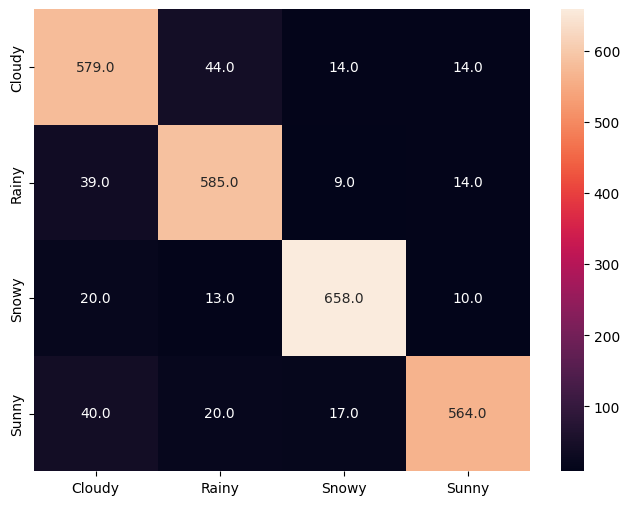

In [76]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel='rbf'))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions using the pipeline on the test data
y_pred = pipe.predict(X_test)

print("training score: ",pipe.score(X_train, y_train))
print("*"*30)
print("test score: ",pipe.score(X_test, y_test))
# Print the classification report for the pipeline model
class_report_pipe = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report_pipe)

# Print the confusion matrix for the pipeline model
conf_matrix_pipe = confusion_matrix(y_pred=y_pred, y_true=y_test)


plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_pipe, annot=True, fmt=".1f", xticklabels=labels, yticklabels=labels)
plt.show()


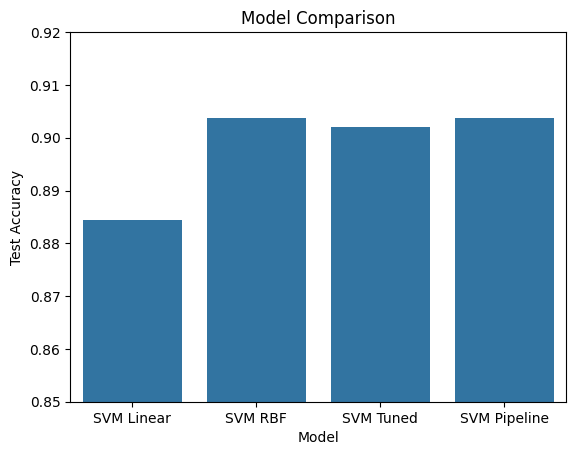

In [79]:
results = pd.DataFrame({
    "Model": ["SVM Linear", "SVM RBF", "SVM Tuned", "SVM Pipeline"],
    "Test Accuracy": [0.8845, 0.9037, 0.902, pipe.score(X_test, y_test)]
})
sns.barplot(data=results, x="Model", y="Test Accuracy")
plt.ylim(0.85, 0.92)
plt.title("Model Comparison")
plt.show()

### Conclusion

1. **SVM with Linear Kernel:**
   - Accuracy: 0.8845
   - Provides a good baseline but struggles with complex relationships.

2. **SVM with RBF Kernel:**
   - Accuracy: 0.9037
   - Shows significant improvement, handling non-linear patterns effectively.

3. **Custom SVM Model:**
   - Accuracy: 0.902
   - Performs well with specified hyperparameters, demonstrating the importance of tuning.

The RBF kernel SVM achieves the highest accuracy, making it the best choice for weather type classification. 